In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

In [3]:
df = pd.read_csv("./data/Training_Data_0611N_cleaned.csv")
df.shape

(19595, 50)

### Benchmarking using XGBoost

In [4]:
def xgb_accuracy(df, num_rows):
    df_non_cat = df.loc[0:num_rows].select_dtypes(exclude=['object'])

    X = df_non_cat.drop(columns='profitable_flag').values
    Y = df_non_cat['profitable_flag'].values
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    return model, accuracy

In [5]:
accuracies = []
num_rows = list(range(1,100,10))
num_rows.extend(range(100,1000,100))
num_rows.extend(range(1000,19000,1000))

for num in num_rows:
    _, accuracy = xgb_accuracy(df, num)
    accuracies.append(accuracy)

<Figure size 2000x500 with 0 Axes>

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'No. of rows')]

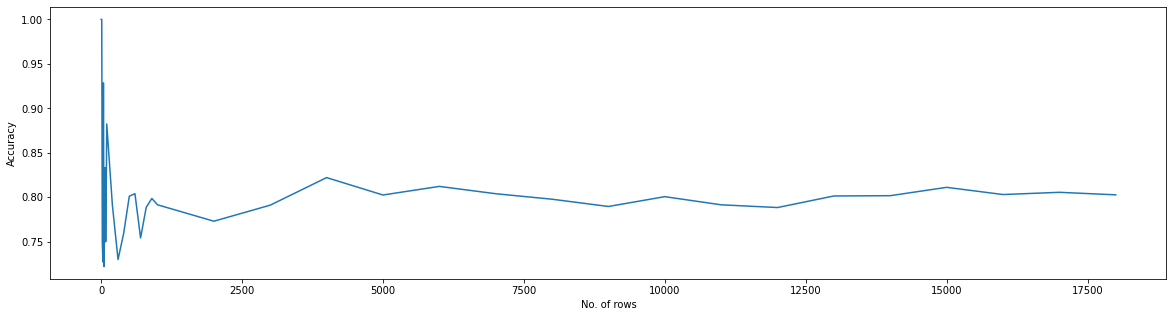

In [6]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x=num_rows, y=accuracies)
ax.set(xlabel='No. of rows', ylabel='Accuracy')
plt.show()
# accuracies

### Feature importance using XGBoost

In [12]:
model, accuracy = xgb_accuracy(df, df.shape[0])

<Figure size 1200x1500 with 0 Axes>

<BarContainer object of 46 artists>

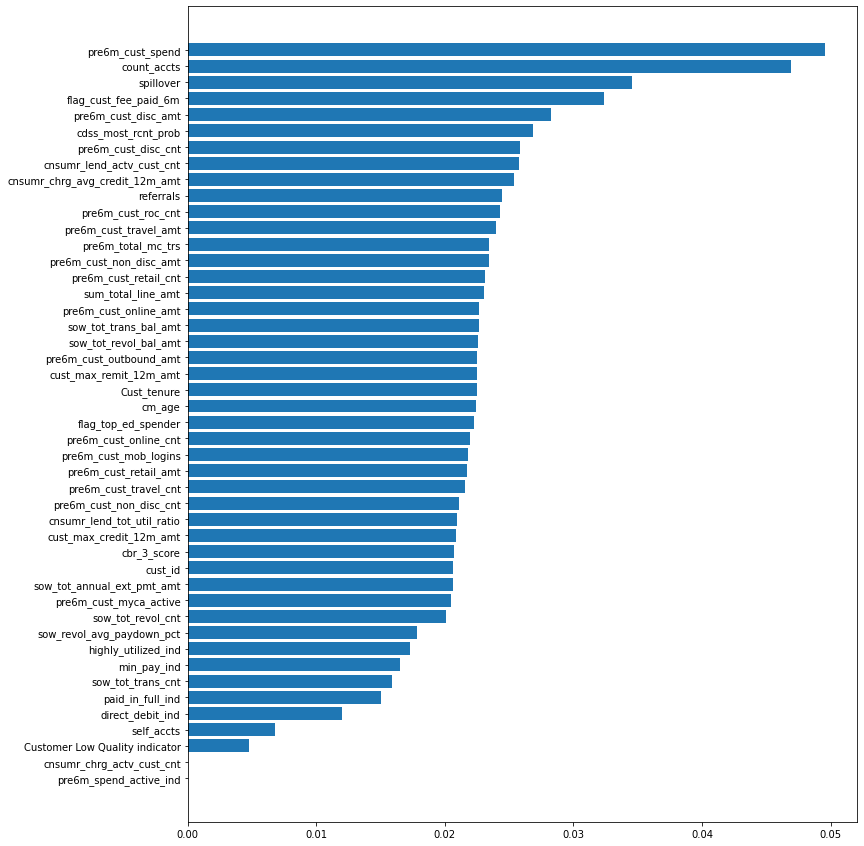

In [21]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(12,15))
plt.barh(df.select_dtypes(exclude=['object']).drop(columns='profitable_flag').columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.show()

### Removing highly correlated features

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
threshold = 0.05
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

In [ ]:
df_non_cat = df[].select_dtypes(exclude=['object'])
df_non_cat = df_non_cat.drop(columns=to_drop)

df_non_cat.columns

X = df_non_cat.drop(columns='profitable_flag')
X = X.values
Y = df_non_cat['profitable_flag'].values

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))